In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import glob
import os.path
import stephane.cine as cine
import stephane.tools.rw_data as rw_data
import matplotlib.pyplot as plt
import numpy as np
import time
import stephane.display.graphes as graphes
import stephane.hdf5.h5py_s as h5py_s

In [3]:
savedir = './Interface_processing/Data/'
os.makedirs(savedir)

OSError: [Errno 17] File exists: './Interface_processing/Data/'

In [6]:
folder = '/Volumes/Chicago2/Experiments_Princeton/Balloon/'
cinenames = glob.glob(folder+'*/balloon*cine')+glob.glob(folder+'*/Balloon*cine')

In [7]:
trash=[] # clean the dataset
for name in cinenames:
    D={}
    if 'rode' in name:
        trash.append(name)
        print('Not a balloon experiment')

    if ('nopump' in name):
        D['tbg']=False # no turbulent background
    elif ('pump' in name):
        D['tbg']=True # no turbulent background
    else:
        trash.append(name)
        print('Not a balloon experiment')
for t in trash:
    cinenames.remove(t)

Not a balloon experiment
Not a balloon experiment
Not a balloon experiment


/Volumes/Chicago2/Experiments_Princeton/Balloon/170808/balloon_4pumps_fps20000.cine
File ./Interface_processing/Data/balloon_4pumps_fps20000.hdf5 already exists, skip 
/Volumes/Chicago2/Experiments_Princeton/Balloon/171109/balloon_breakup_4pumps_fps10000_backlight_D400minch.cine
File ./Interface_processing/Data/balloon_breakup_4pumps_fps10000_backlight_D400minch.hdf5 already exists, skip 
/Volumes/Chicago2/Experiments_Princeton/Balloon/171109/balloon_breakup_nopumps_fps10000_backlight_D400minch.cine


IndexError: tuple index out of range

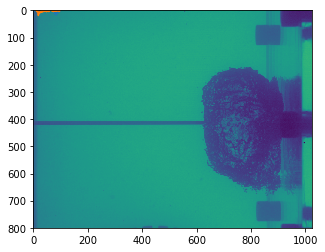

In [9]:
trash=[]
for name in cinenames:
    figs={}
    print(name)
    D={}
    if ('nopump' in name):
        D['tbg']=False # no turbulent background
    elif ('pump' in name):
        D['tbg']=True # no turbulent background
    else:
        trash.append(name)
        print('Not a balloon experiment')
        
    # get the parameters (spatial scale)
    reffile=glob.glob(os.path.dirname(name)+'/Ref*')[0] # read the reference file with the scale
    header,params=rw_data.read_dataFile(reffile,Ddelimiter='\t',Hdelimiter='\t')
    D['param']=params

    # save other information in a dictionnary
    c=cine.Cine(name)
    D['date']=os.path.dirname(name)[-6:]
    D['param']['nt']=c.length
    D['name']=name
    
    # find reference image 
    indices = range(0,np.min([10000,c.length-100]),100)
    I0 = np.diff([np.mean(c.get_frame(i),axis=(0,1)) for i in indices])
    i = indices[np.argmin(I0)+1]
    
    plt.plot(I0)
    plt.imshow(c.get_frame(i))
    
    #figs.update(graphes.legende('','','',cplot=True))
    #graphes.save_figs(figs,savedir=savedir)
    D['im0']=c.get_frame(i)
    D['param']['i0']=i
    
    filename = savedir+os.path.basename(name)[:-5]+'.hdf5'
    h5py_s.example(filename,Dict=D,key='B')

for t in trash: # clean the dataset
    cinenames.remove(t)

In [57]:
c=cine.Cine(cinenames[0])

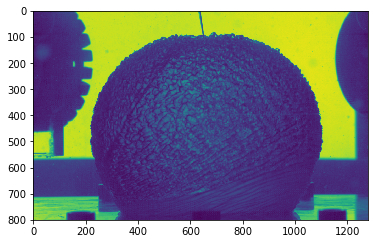

In [70]:
plt.imshow(c.get_frame(6550))

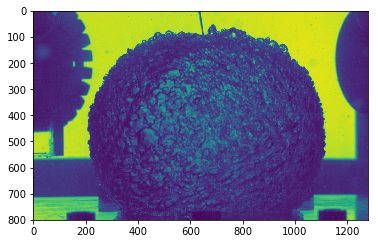

10408

In [19]:
folder = '/Users/stephane/Documents/Postdoc_Princeton/Balloon/Crack_opening/20170808_fps20k/'
D_0 = proc.load(folder,step=1)

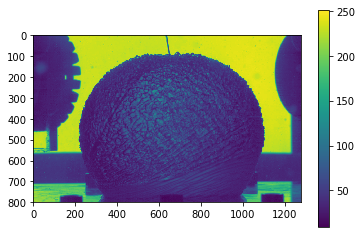

In [24]:
plt.imshow(np.transpose(D_0['im'][59,:,:]))
plt.colorbar()

In [15]:
#estimate of the shear
U_0 = 30 #in m/s
t0 = 10**-3 # shear time in s
nu = 10**-6
delta = np.sqrt(nu*t0)
eta = U_0/(np.sqrt(np.pi)*delta)
print(eta)
print(delta)

535237.234846
3.16227766017e-05
